In [20]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [21]:
from typing import Callable

def parabola(a, b, c) -> Callable[[int], int]:
    return lambda t: a*(t - 2022)**2 + b*(t - 2022) + c

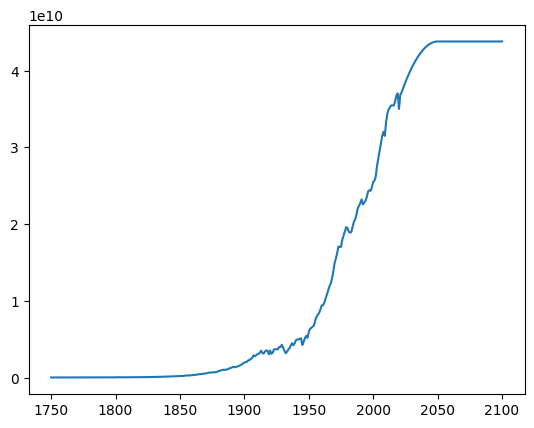

,Year,CO2
0,1750,9.305937e+06
1,1751,9.407229e+06
2,1752,9.505168e+06
3,1753,9.610490e+06
4,1754,9.733580e+06
...,...,...
73,2096,4.380058e+10
74,2097,4.380058e+10
75,2098,4.380058e+10
76,2099,4.380058e+10


In [22]:
# CO2_1.csv
co2 = pd.read_csv(r"../data/CO2.csv")

# b is average growth rate for past 20 years
diff = co2.loc[co2["Year"] == 2022].iloc[0]["CO2"] - co2.loc[co2["Year"] == 2003].iloc[0]["CO2"]
b = diff / (2022 - 2003 + 1)

# a satisfies [2a(28) + b = 0]
a = -b / 56

# c = the true value for 2022 in CO2.csv
c = co2.loc[co2["Year"] == 2022].iloc[0]["CO2"]

predict = parabola(a, b, c)
predictions = pd.DataFrame(
    {
        "Year": [t for t in range(2023, 2100+1)],
        "CO2": [predict(t) for t in range(2023, 2050+1)] + [predict(2050) for t in range(2051, 2100+1)],
    }
)

co2_1 = pd.concat([co2, predictions])
co2_1.to_csv(r"CO2_1.csv", index=False)

plt.plot(np.asarray(co2_1["Year"], float), co2_1["CO2"])
plt.show()
co2_1

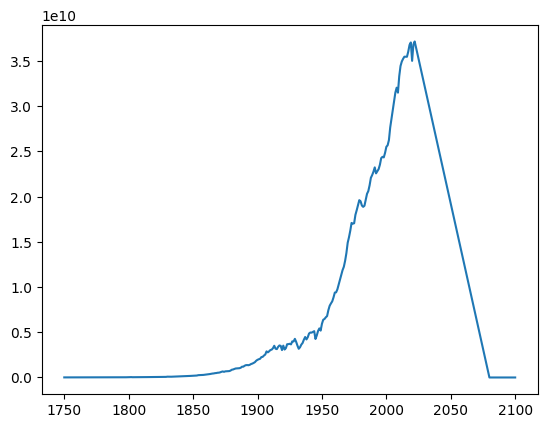

,Year,CO2
0,1750,9305937.0
1,1751,9407229.0
2,1752,9505168.0
3,1753,9610490.0
4,1754,9733580.0
...,...,...
73,2096,0.0
74,2097,0.0
75,2098,0.0
76,2099,0.0


In [23]:
# CO2_2.csv
co2 = pd.read_csv(r"../data/CO2.csv")

a = 0

# c = the true value for 2022 in CO2.csv
c = co2.loc[co2["Year"] == 2022].iloc[0]["CO2"]

# b satisfies b(2080 - 2022) + c = 0 
diff = 0 - c
b = diff / (2080 - 2022)


predict = parabola(a, b, c)
predictions = pd.DataFrame(
    {
        "Year": [t for t in range(2023, 2100+1)],
        "CO2": [predict(t) for t in range(2023, 2080+1)] + [predict(2080) for t in range(2081, 2100+1)],
    }
)

co2_2 = pd.concat([co2, predictions])
co2_2.to_csv(r"CO2_2.csv", index=False)

plt.plot(np.asarray(co2_2["Year"], float), co2_2["CO2"])
plt.show()
co2_2

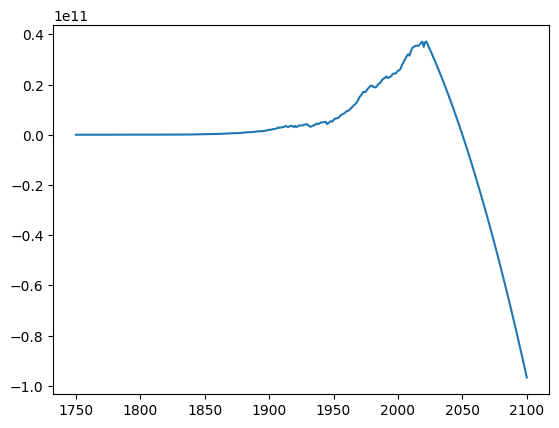

,Year,CO2
0,1750,9305937.0
1,1751,9407229.0
2,1752,9505168.0
3,1753,9610490.0
4,1754,9733580.0
...,...,...
73,2096,-87490994308.8553
74,2097,-89758302217.4754
75,2098,-92041156073.8177
76,2099,-94339555877.8822


In [35]:
import sympy

# CO2_3.csv

co2 = pd.read_csv(r"../data/CO2.csv")

"""
E(t) = a(t - 2022)^2 + b(t - 2022) + c, such that:
    E(2022) = c = the true value in CO2.csv
    E(2050) = a(2050 - 2022)^2 + b(2050 - 2022) + c = 0
    sum E[t = 1750~2100] = 0
"""

a = sympy.Symbol("a")
b = sympy.Symbol("b")
c = sympy.Symbol("c")
predict = parabola(a, b, c)
equations = [
    c - co2.loc[co2["Year"] == 2022].iloc[0]["CO2"],
    a*(2050 - 2022)**2 + b*(2050 - 2022) + c,
    co2["CO2"].sum() + sum([predict(t) for t in range(2023, 2100+1)])
]

solution = sympy.solve(equations, a, b, c)
predict = parabola(solution[a], solution[b], solution[c])
predictions = pd.DataFrame(
    {
        "Year": [t for t in range(2023, 2100+1)],
        "CO2": [predict(t) for t in range(2023, 2100+1)],
    }
)

co2_3 = pd.concat([co2, predictions])
co2_3.to_csv(r"CO2_3.csv", index=False)

assert abs(co2_3["CO2"].sum()) < 1
plt.plot(np.asarray(co2_3["Year"], float), co2_3["CO2"])
plt.show()
co2_3






np.float64(1772867553411.0)